# 1. `sasmodels` data

We start our tutorial with learning how to load scattering data into `sasmodels` data objects so that they may be used for fitting procedures. Each data object is required to have data for the scattering vector, q, scattering intensity, I(q), and the error associated with the intensity, dI(q). You can additionally add an error for the scattering vector, dq, but it is not required. If dq is included, the model will take this into account numerically.

Please note that `sasmodels` assumes your data is in units of inverse Angstroms for the scattering vector, q, and so remember to convert units after reading the data and prior to creating the data object if necessary.

In [57]:
from bumps.names import Parameter
from bumps.fitters import fit

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

import sasmodels
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment

import bumps

# uncomment and edit line below to add path to the sasview source code
# sys.path.append("/path/to/sasview/src")
import sas

Begin by loading your data using your favorite python method, but numpy and pandas are recommended as the data needs to be provided to the sasmodels data object in either format. Here we demonstrate loading data in a csv file format using both numpy and pandas. After you load the data, change the units of scattering vector, q, to units of inverse Angstroms if needed. If your intensity is on an absolute scale, please ensure it is in units of inverse centimeters.

In [59]:
# data is provided in csv file, columns are q, Iq, and dIq
data_np = np.loadtxt('../example_data/sphere.csv',delimiter=',')
data_np[:5,:]

array([[ 1.00000000e-03,  4.20896367e+04,  2.02727328e+03],
       [ 1.84984985e-03,  4.35972883e+04,  5.13778731e+03],
       [ 2.69969970e-03,  4.00757524e+04,  1.18975853e+03],
       [ 3.54954955e-03,  4.18294232e+04,  5.61134889e+03],
       [ 4.39939940e-03,  3.46166832e+04, -2.99762307e+03]])

In [60]:
data_pd = pd.read_csv('../example_data/sphere.csv')
data_pd.columns = ['q','Iq','dIq']
data_pd.head(5)

,q,Iq,dIq
0,0.001000,42089.636674,2027.273282
1,0.001850,43597.288296,5137.787311
2,0.002700,40075.752364,1189.758531
3,0.003550,41829.423163,5611.348887
4,0.004399,34616.683161,-2997.623067


A `sasmodels.data.Data1D` object is used for 1-dimensional data of I(q) versus q. You can specify q, I(q) and dI(q) directly as the x, y, and dy attributes of the sasmodels data object.

In [71]:
list(data_np[:,0])

[0.001,
 0.00184984984984985,
 0.0026996996996997,
 0.0035495495495495495,
 0.004399399399399399,
 0.005249249249249249,
 0.006099099099099099,
 0.006948948948948949,
 0.007798798798798799,
 0.008648648648648649,
 0.009498498498498497,
 0.010348348348348347,
 0.011198198198198197,
 0.012048048048048047,
 0.012897897897897897,
 0.013747747747747747,
 0.014597597597597597,
 0.015447447447447447,
 0.016297297297297297,
 0.017147147147147147,
 0.017996996996996997,
 0.018846846846846847,
 0.019696696696696697,
 0.020546546546546546,
 0.021396396396396396,
 0.022246246246246246,
 0.023096096096096096,
 0.023945945945945946,
 0.024795795795795796,
 0.025645645645645646,
 0.026495495495495496,
 0.027345345345345346,
 0.028195195195195196,
 0.029045045045045046,
 0.029894894894894896,
 0.030744744744744746,
 0.03159459459459459,
 0.03244444444444444,
 0.03329429429429429,
 0.03414414414414414,
 0.03499399399399399,
 0.03584384384384384,
 0.03669369369369369,
 0.03754354354354354,
 0.0383933933

In [73]:
sas_data_np = sasmodels.data.Data1D(x=data_np[:,0], y=data_np[:,1], dy=data_np[:,2])
sas_data_pd = sasmodels.data.Data1D(x=data_pd.q, y=data_pd.Iq, dy=data_pd.dIq)

You can access the data by the different attributes of the data object:

In [62]:
# q data from the numpy approach
sas_data_np.x

array([0.001     , 0.00184985, 0.0026997 , 0.00354955, 0.0043994 ,
       0.00524925, 0.0060991 , 0.00694895, 0.0077988 , 0.00864865,
       0.0094985 , 0.01034835, 0.0111982 , 0.01204805, 0.0128979 ,
       0.01374775, 0.0145976 , 0.01544745, 0.0162973 , 0.01714715,
       0.017997  , 0.01884685, 0.0196967 , 0.02054655, 0.0213964 ,
       0.02224625, 0.0230961 , 0.02394595, 0.0247958 , 0.02564565,
       0.0264955 , 0.02734535, 0.0281952 , 0.02904505, 0.02989489,
       0.03074474, 0.03159459, 0.03244444, 0.03329429, 0.03414414,
       0.03499399, 0.03584384, 0.03669369, 0.03754354, 0.03839339,
       0.03924324, 0.04009309, 0.04094294, 0.04179279, 0.04264264,
       0.04349249, 0.04434234, 0.04519219, 0.04604204, 0.04689189,
       0.04774174, 0.04859159, 0.04944144, 0.05029129, 0.05114114,
       0.05199099, 0.05284084, 0.05369069, 0.05454054, 0.05539039,
       0.05624024, 0.05709009, 0.05793994, 0.05878979, 0.05963964,
       0.06048949, 0.06133934, 0.06218919, 0.06303904, 0.06388

In [63]:
# I(q) data from the pandas approach
sas_data_pd.y

0      42089.636674
1      43597.288296
2      40075.752364
3      41829.423163
4      34616.683161
           ...     
995        0.140506
996       -0.004641
997        0.151789
998        0.132858
999        0.082193
Name: Iq, Length: 1000, dtype: float64

`sasmodels` includes a function that allows you to plot the data of a sasmodels.data.Data1D object directly. We can see here that the data was able to be loaded with either the pandas or numpy approach.

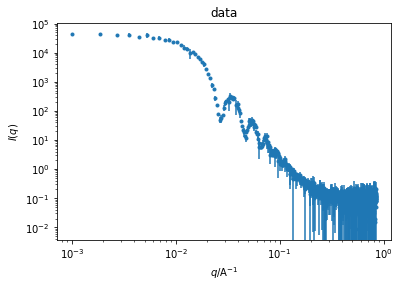

In [68]:
sasmodels.data.plot_data(sas_data_np)

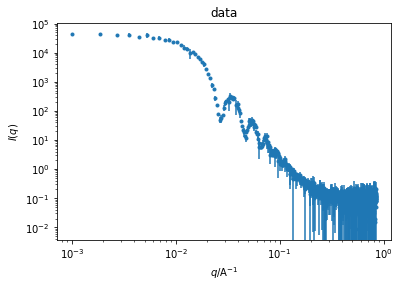

In [69]:
sasmodels.data.plot_data(sas_data_pd)

If you want to format your figures, you can also utilize matplotlib or your favorite plotting package for Python.

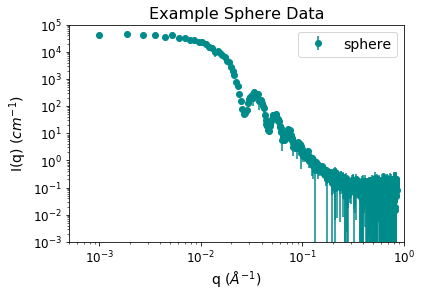

In [81]:
plt.errorbar(sas_data_np.x, sas_data_np.y, yerr=sas_data_np.dy, fmt='o', color='darkcyan', label='sphere')

# x-axis
plt.xlim(5e-4,1e0)
plt.xscale('log')
plt.xlabel('q ($\AA^{-1}$)',fontsize=14)
plt.xticks(fontsize=12)

# y-axis
plt.ylim(1e-3,1e5)
plt.yscale('log')
plt.ylabel('I(q) ($cm^{-1}$)',fontsize=14)
plt.yticks(fontsize=12)

plt.title('Example Sphere Data',fontsize=16)
plt.legend(fontsize=14)

plt.show()